# Importing Dataset

In [3]:
import pandas as pd
data = pd.read_csv("heart.csv")
data.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Pre Processing
checking if there are any missing values

In [4]:
data.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Converting nominal features to binary attributes for decision tree classifiers 

In [6]:
dataEncoded = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
dataEncoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


# Dividing a dataset into 70% training and 30% testing

In [7]:
from sklearn.model_selection import train_test_split 
x = dataEncoded.drop(['HeartDisease'], axis=1)
y = dataEncoded['HeartDisease'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 20)
(276, 20)
(642,)
(276,)


# Decision Tree Classifier with Holdout Method 

In [11]:
from sklearn import tree 
myTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5 )
myTree = myTree.fit(x_train, y_train) 
predictions = myTree.predict(x_test)
from sklearn.metrics import accuracy_score 
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

Accuracy on test data is 0.82


# Utilizing the same Decision Tree Classifier but with Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score, KFold 
kf = KFold(n_splits=5)

scores = cross_val_score(myTree, x, y, cv= kf)

print("Cross Validation Scores (in this case for decision tree, it is the accuracy): ", scores) 
print("Average Score: ", scores.mean())

Cross Validation Scores (in this case for decision tree, it is the accuracy):  [0.88043478 0.82608696 0.83695652 0.75409836 0.78688525]
Average Score:  0.8168923734853883


# Bagging Ensemble Method utilizing decision tree classifier 

In [13]:
from sklearn.ensemble import BaggingClassifier 

bag_model = BaggingClassifier(
    estimator = myTree,
    n_estimators = 100, 
    max_samples=0.8, 
    oob_score = True, 
    random_state = 0
)

bag_model.fit(x_train, y_train)

print("Average Score on out-of-bag: ", bag_model.oob_score_)
print("Average Score of the trained BaggingClassifier on the test dataset: ",bag_model.score(x_test, y_test) )

Average Score on out-of-bag:  0.8660436137071651
Average Score of the trained BaggingClassifier on the test dataset:  0.8260869565217391


# Cross validation with Bagging Classifier 

In [14]:
bag_model = BaggingClassifier(
    n_estimators = 100, 
    max_samples=0.8, 
    oob_score = True, 
    random_state = 0 
)

scores = cross_val_score(bag_model, x, y, cv = 10)
print("Average Score: ", scores.mean())

Average Score:  0.83865265169613


# 30-fold cross-validation of a Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), x, y, cv=30)
scores.mean()

0.8675985663082437

# K-means clustering example (restarting steps) 

In [83]:
data = pd.read_csv("heart.csv")
data.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Drop class attribute 

In [84]:
data = data.drop(['HeartDisease'], axis = 1) 
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [88]:
dataEncoded = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
dataEncoded.head() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


# Scatter plot matrix to learn about the dataset 

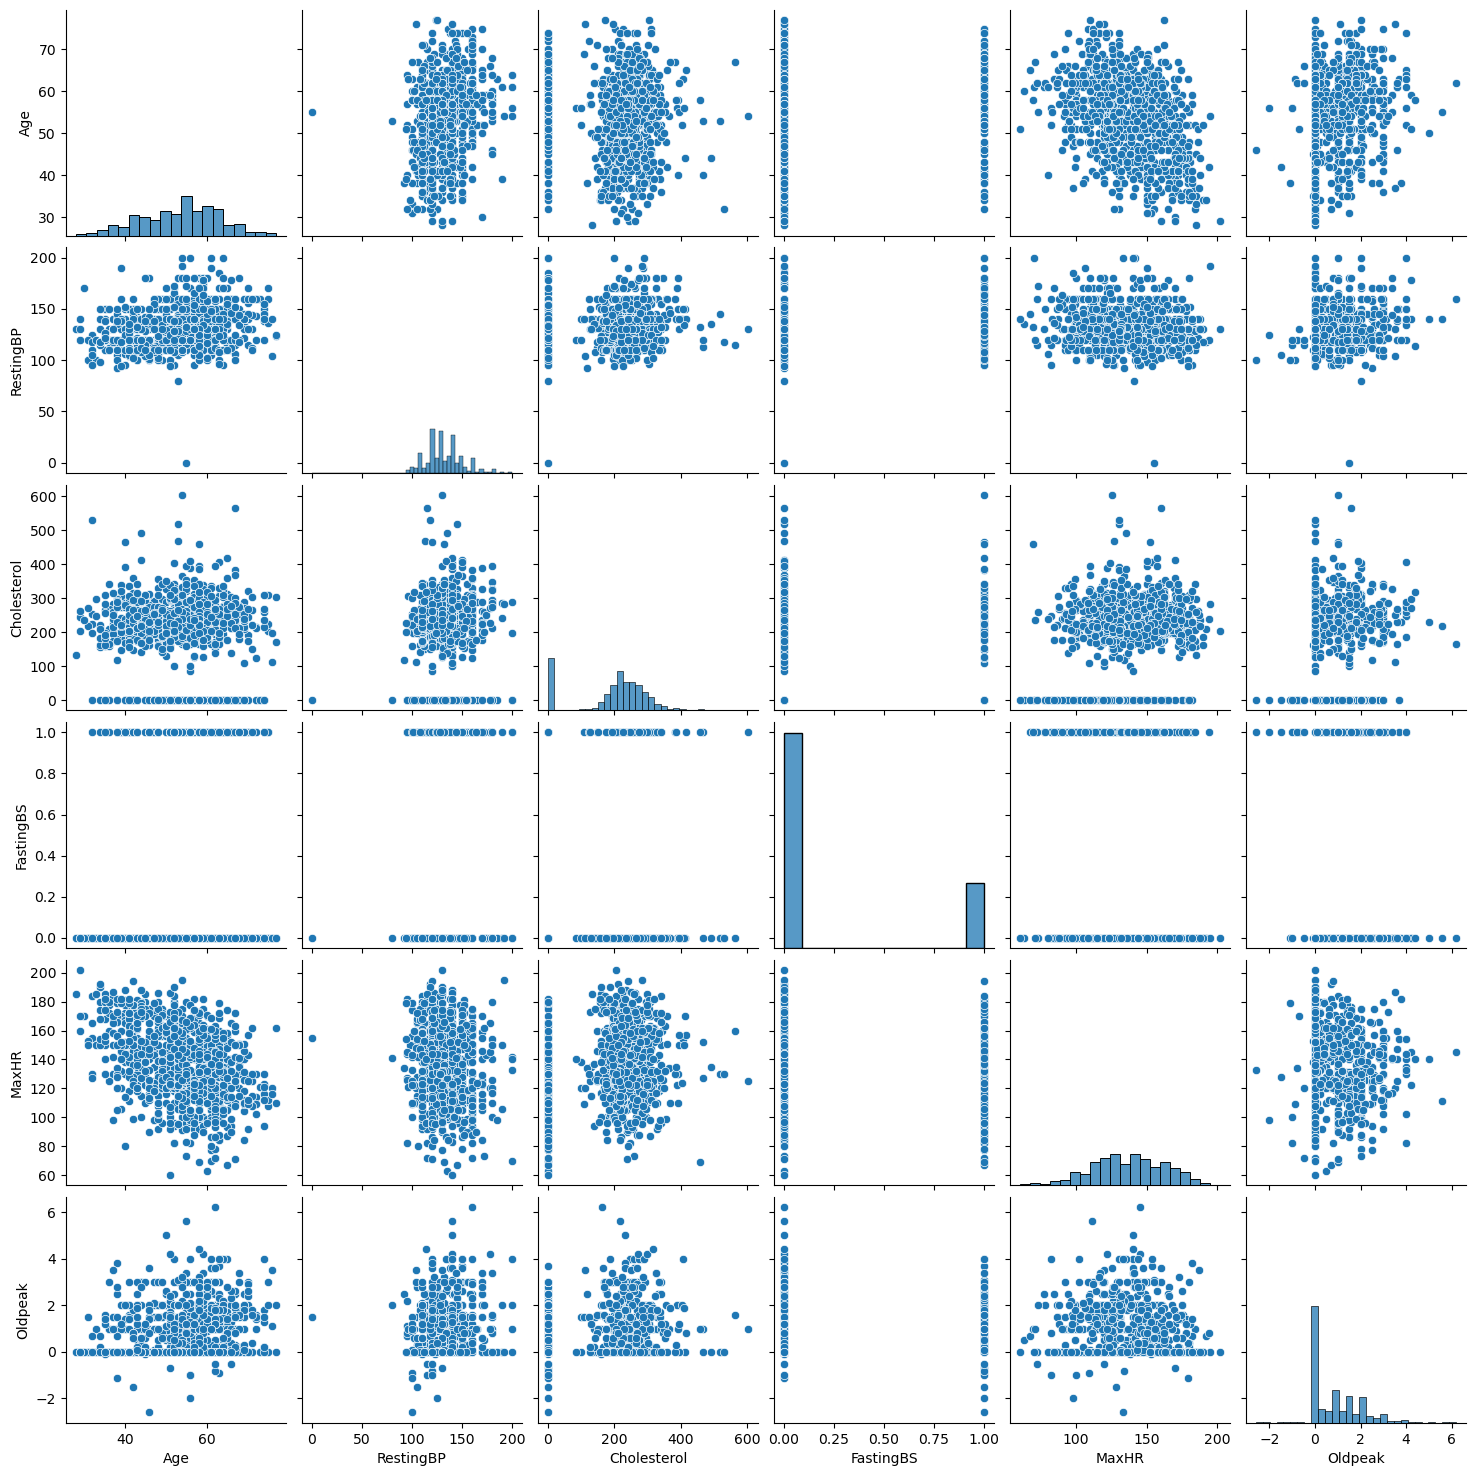

In [89]:
import seaborn as sns 
sns.pairplot(data)

# K-means algorithm 

In [134]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2, max_iter=50)
k_means.fit(dataEncoded)
labels = k_means.labels_

C:\Users\akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# View cluster centers (centroids)

In [135]:
k_means.cluster_centers_

array([[5.28159675e+01, 1.33097429e+02, 2.45940460e+02, 1.66441137e-01,
        1.40349120e+02, 8.95940460e-01, 2.46278755e-01, 7.53721245e-01,
        4.93910690e-01, 2.23274696e-01, 2.27334235e-01, 5.54803789e-02,
        2.35453315e-01, 5.95399188e-01, 1.69147497e-01, 6.17050068e-01,
        3.82949932e-01, 5.68335589e-02, 4.73612991e-01, 4.69553451e-01],
       [5.63798883e+01, 1.29502793e+02, 4.17877095e+00, 5.08379888e-01,
        1.22195531e+02, 8.51955307e-01, 6.14525140e-02, 9.38547486e-01,
        7.31843575e-01, 4.46927374e-02, 1.95530726e-01, 2.79329609e-02,
        7.82122905e-02, 6.25698324e-01, 2.96089385e-01, 5.08379888e-01,
        4.91620112e-01, 1.17318436e-01, 6.14525140e-01, 2.68156425e-01]])

In [136]:
dataWithLabels = pd.concat((dataEncoded, pd.DataFrame(labels)), axis = 1)

dataWithLabels.columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'cluster']
dataWithLabels.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,cluster
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,0
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


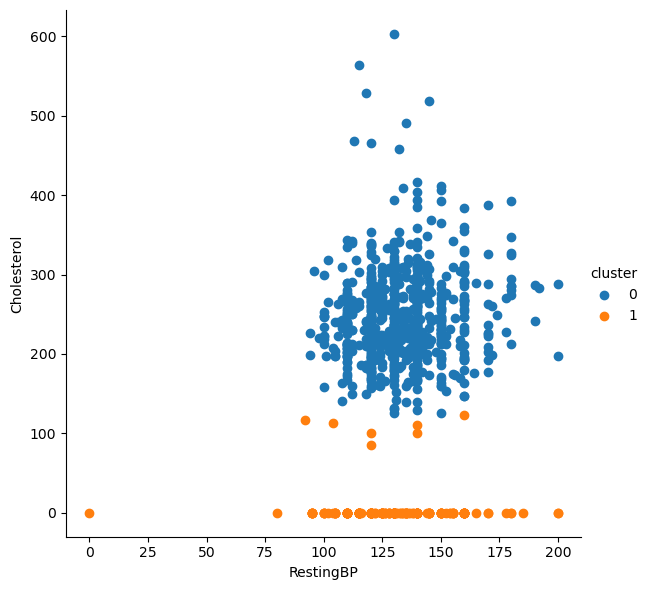

In [137]:
import matplotlib.pyplot as plt 
sns.FacetGrid(dataWithLabels, hue="cluster",
              height= 6).map(plt.scatter, 'RestingBP', 'Cholesterol').add_legend()